In [1]:
import librosa
import librosa.display as ld
import matplotlib.pyplot as plt
import numpy as np
import numpy, scipy, matplotlib.pyplot as plt, IPython.display as ipd
import librosa, librosa.display
import torch


/Users/amaladeshpande/anaconda3/lib/python3.6/site-packages/numba/errors.py:105: UserWarning: Insufficiently recent colorama version found. Numba requires colorama >= 0.3.9
  warnings.warn(msg)


In [2]:
y, sr = librosa.load("train/cat/004ae714_nohash_0.wav", sr=None)
ipd.Audio(y, rate=sr)

# STFT

In [3]:
y.shape, sr


((16000,), 16000)

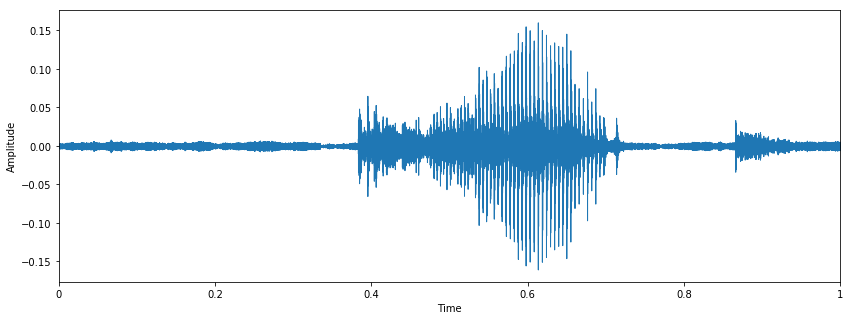

In [4]:
plt.figure(figsize=(14, 5))
plt.ylabel("Amplitude")
librosa.display.waveplot(y, sr=sr)
plt.show()

In [5]:
window_size=0.02
window_stride=0.01
window="hamming"
n_fft = int(sr * window_size)
win_length = n_fft
hop_length = int(sr * window_stride)

In [6]:
D = librosa.stft(y, n_fft=n_fft, hop_length=hop_length,
                     win_length=win_length, window=window)
D.shape

(161, 101)

In [7]:
spect, phase = librosa.magphase(D)

/Users/amaladeshpande/anaconda3/lib/python3.6/site-packages/librosa/core/spectrum.py:983: UserWarning: amplitude_to_db was called on complex input so phase information will be discarded. To suppress this warning, call amplitude_to_db(np.abs(S)) instead.
  warnings.warn('amplitude_to_db was called on complex input so phase '


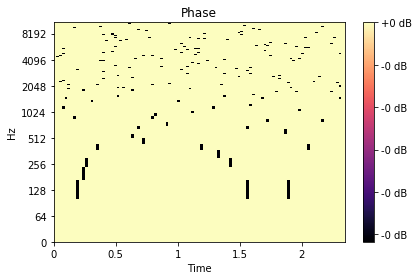

In [8]:
ld.specshow(librosa.amplitude_to_db(phase,ref=np.max),y_axis='log', x_axis='time')
plt.title('Phase') 
plt.colorbar(format='%+2.0f dB')
plt.tight_layout()
plt.show()

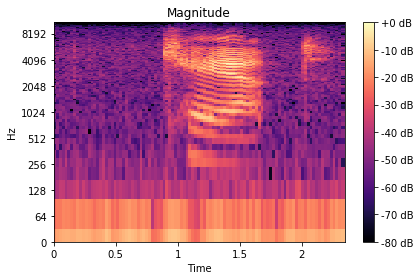

In [9]:
ld.specshow(librosa.amplitude_to_db(spect,ref=np.max),y_axis='log', x_axis='time')
plt.title('Magnitude') 
plt.colorbar(format='%+2.0f dB')
plt.tight_layout()
plt.show()

In [10]:
spect.shape

(161, 101)

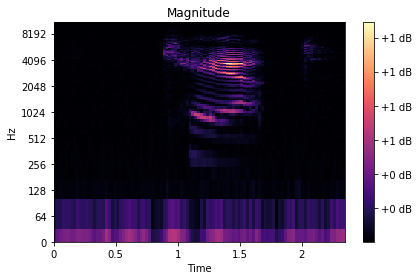

In [11]:
spect = np.log1p(spect)
ld.specshow(spect,y_axis='log', x_axis='time')
plt.title('Magnitude') 
plt.colorbar(format='%+2.0f dB')
plt.tight_layout()
plt.show()

# MEL Spectrogram


Using y_axis=mel plots the y-axis on the mel scale which is similar to the  log(1+f)  function:

m=2595*log10(1+f/700)

In [12]:
S=librosa.feature.melspectrogram(y, sr=sr,n_fft=n_fft,hop_length=hop_length)
logS = librosa.power_to_db(abs(S))

/Users/amaladeshpande/anaconda3/lib/python3.6/site-packages/librosa/filters.py:284: UserWarning: Empty filters detected in mel frequency basis. Some channels will produce empty responses. Try increasing your sampling rate (and fmax) or reducing n_mels.
  warnings.warn('Empty filters detected in mel frequency basis. '


In [13]:
logS.shape

(128, 101)

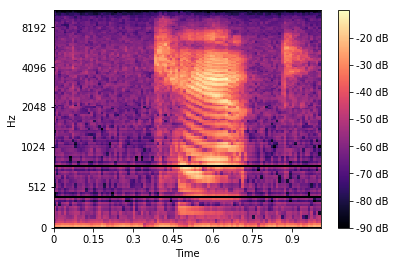

In [14]:

librosa.display.specshow(logS, sr=sr, hop_length=hop_length, x_axis='time', y_axis='mel')
plt.colorbar(format='%+2.0f dB')
plt.show()

In [ ]:
mfcc = librosa.feature.mfcc(y, sr=sr)

plt.figure(figsize=(12, 4))
librosa.display.specshow(mfcc, sr=sr, x_axis='time')
plt.ylabel('MFCC coeffs')
plt.xlabel('Time')
plt.title('MFCC')
plt.colorbar()
plt.tight_layout()
plt.show()

In [ ]:
log = librosa.power_to_db(abs(mfcc))

In [ ]:
librosa.display.specshow(log, sr=sr, hop_length=hop_length, x_axis='time', y_axis='mel')
plt.colorbar(format='%+2.0f dB')
plt.show()

In [ ]:
mfcc.shape